<a href="https://colab.research.google.com/github/aksharat/Medical-Projects/blob/main/WarmUp/WarmUp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://imgcom.jsrt.or.jp/imgcom/wp-content/uploads/2018/11/Directions01.zip

--2023-10-10 21:27:03--  http://imgcom.jsrt.or.jp/imgcom/wp-content/uploads/2018/11/Directions01.zip
Resolving imgcom.jsrt.or.jp (imgcom.jsrt.or.jp)... 158.199.228.161
Connecting to imgcom.jsrt.or.jp (imgcom.jsrt.or.jp)|158.199.228.161|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13005411 (12M) [application/zip]
Saving to: ‘Directions01.zip’

Directions01.zip    100%[===================>]  12.40M   455KB/s    in 41s     

2023-10-10 21:27:45 (308 KB/s) - ‘Directions01.zip’ saved [13005411/13005411]



In [ ]:
!unzip Directions01.zip

In [ ]:
!wget http://imgcom.jsrt.or.jp/imgcom/wp-content/uploads/2019/07/autoencoder_img.zip
!unzip autoencoder_img.zip

In [ ]:
!pip install anomalib

In [ ]:
!git clone https://github.com/openvinotoolkit/anomalib.git

In [ ]:
cd anomalib

/content/anomalib


In [ ]:
!pip install wandb

In [ ]:
!pip install OpenVINO

In [ ]:
!unzip /content/FullImage.zip

In [ ]:
import os
import numpy as np
from PIL import Image


def load_images_from_folder(folder, target_size=(100, 100), grayscale=True):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)

        # Resize and convert to grayscale if needed
        if target_size:
            img = img.resize(target_size)
        if grayscale:
            img = img.convert('L')

        # Convert image to NumPy array
        img_np = np.array(img)
        images.append(img_np)
    return images

folder_path = 'FullImage'
images = load_images_from_folder(folder_path)
images_array = np.array(images)
np.save('images_data.npy', images_array)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

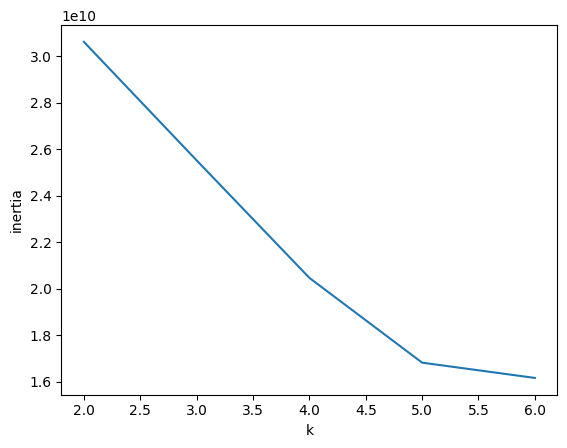

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4], dtype=int32), array([ 34, 237, 237, 237, 237]))


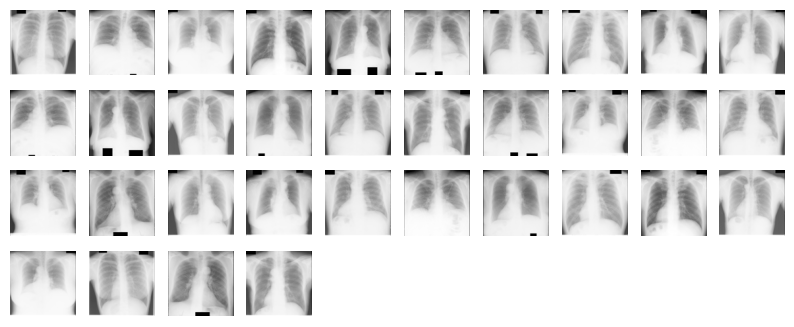

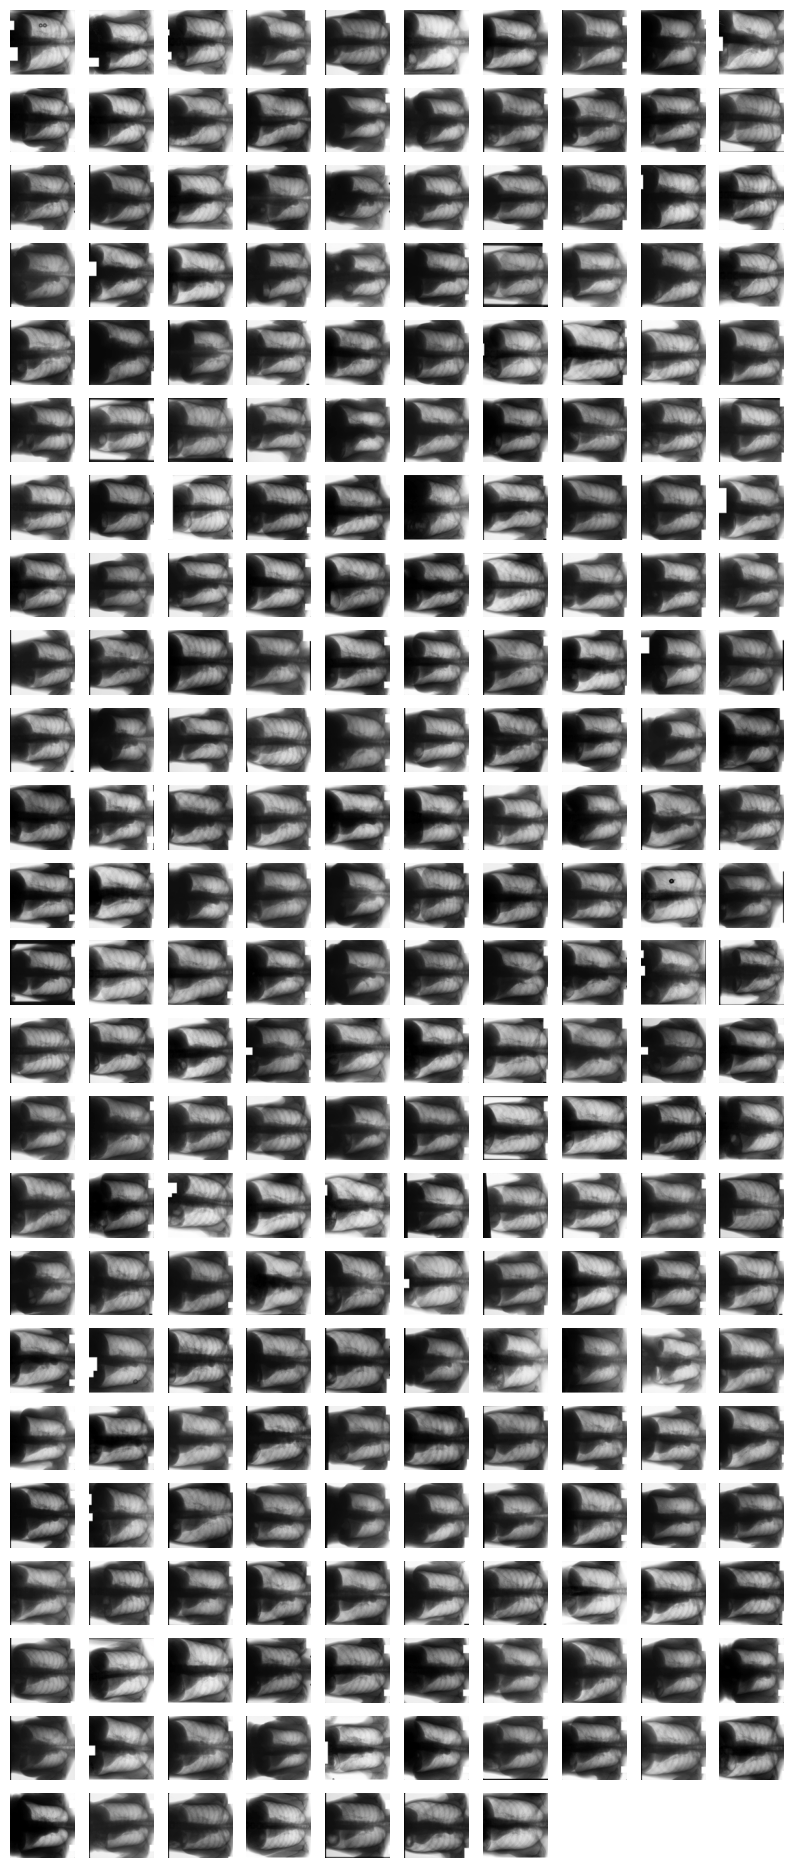

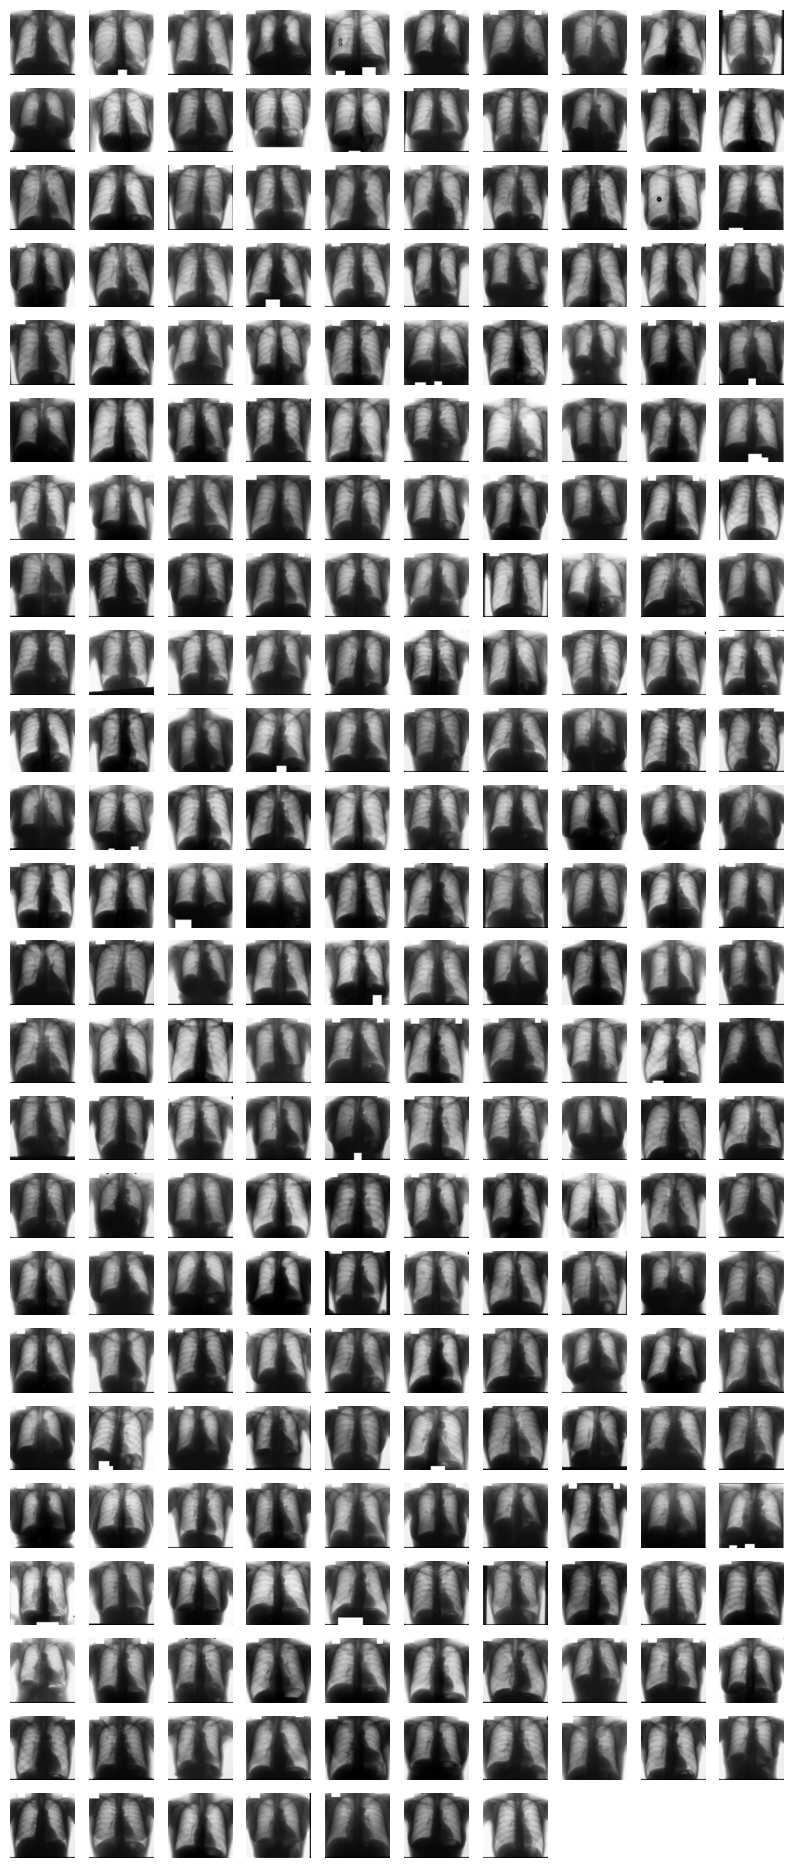

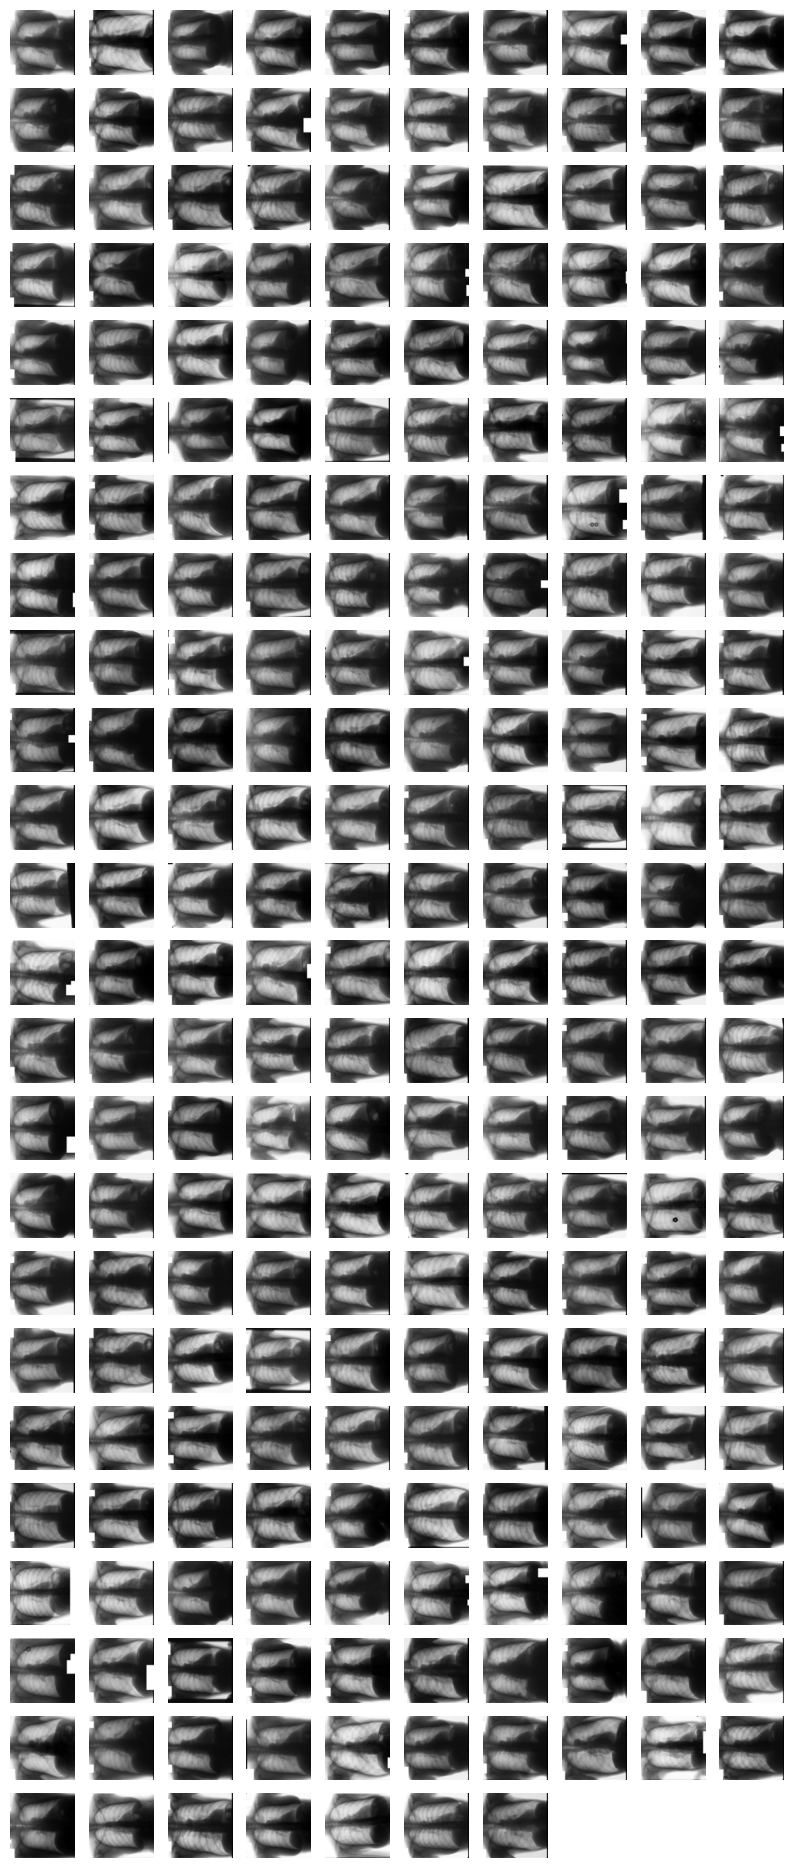

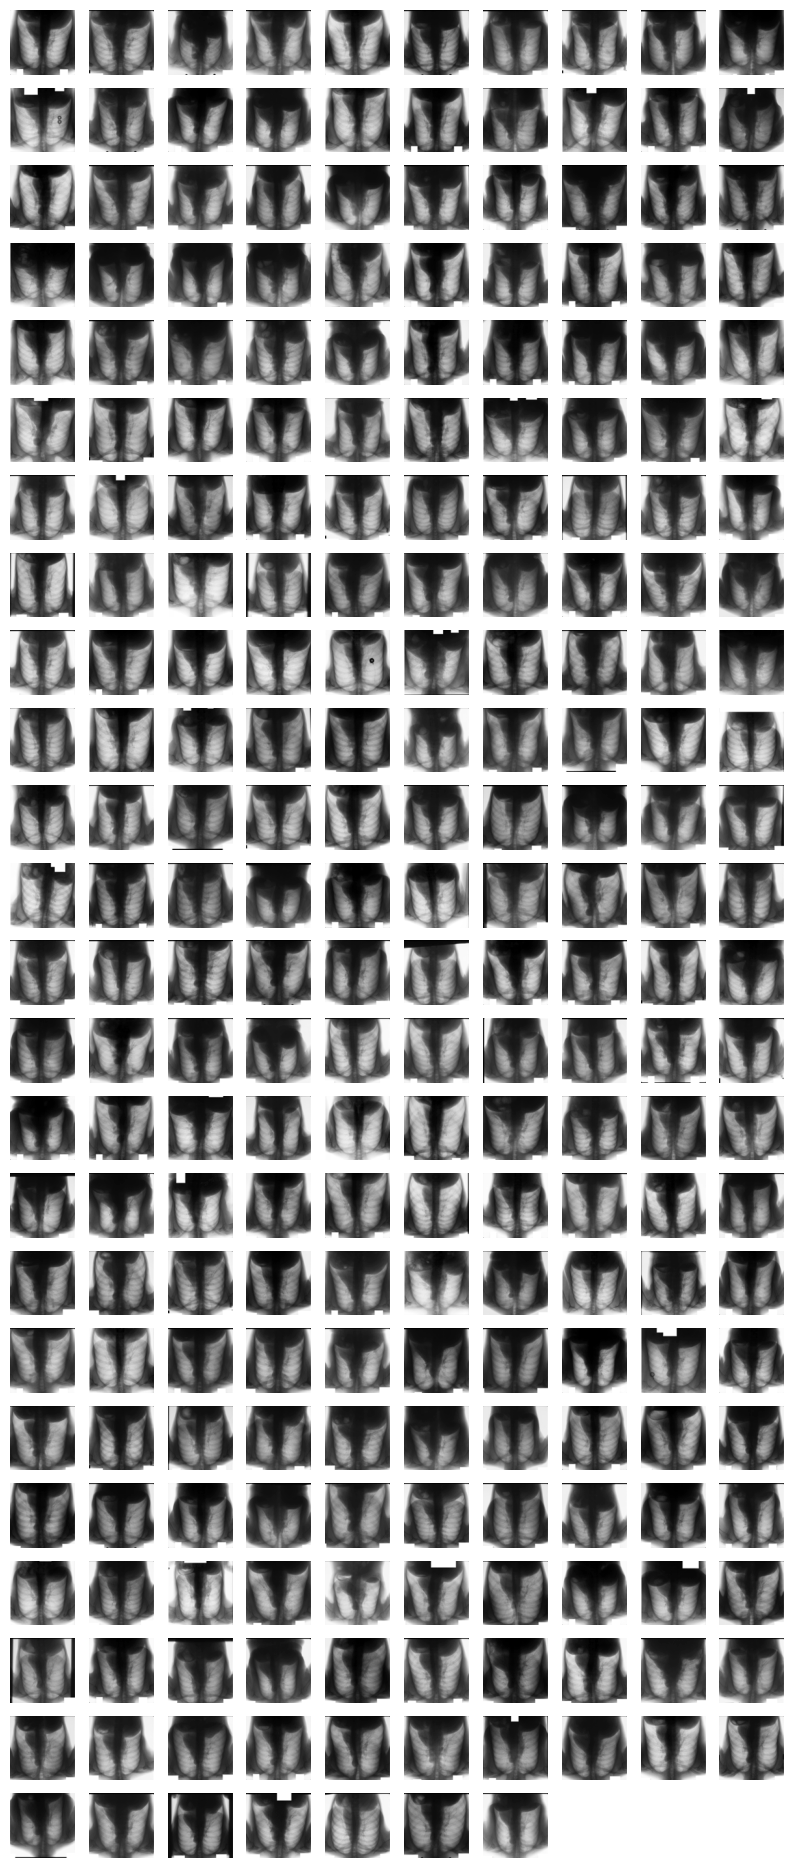

0.9396021353698564


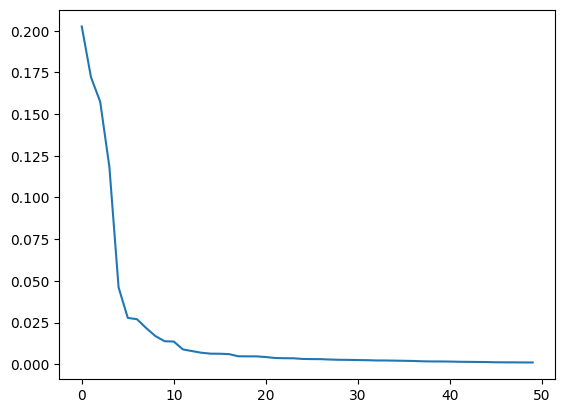

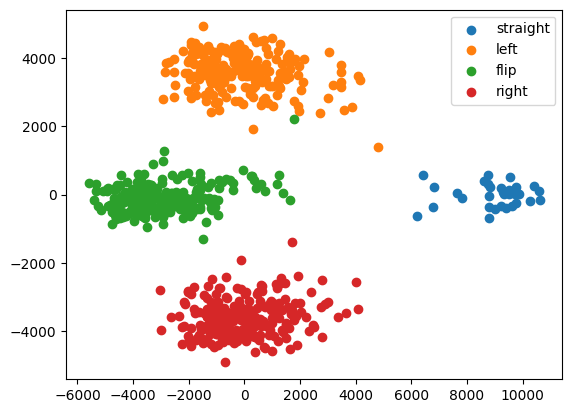

In [ ]:
import numpy as np
import matplotlib.pyplot as plt






fruits = np.load('images_data.npy')
fruits

fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape
from sklearn.cluster import KMeans

km = KMeans(init='random', random_state=2207)
km.fit(fruits_2d)


inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=2207)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

km = KMeans(init='random', n_clusters=5, random_state=2207)
km.fit(fruits_2d)
print(np.unique(km.labels_, return_counts=True))
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])
draw_fruits(fruits[km.labels_==3])
draw_fruits(fruits[km.labels_==4])

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)


print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

fruits_pca = pca.transform(fruits_2d)

for label in range(0, 4):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['straight', 'left','flip','right','bottom'])
plt.show()
